### Universidad del Valle de Guatemala
### Modelado y Simulacion
#### MICRO PROYECTO 1
##### Juan Marroquin 19845
##### Carlos Raxtum 19721

import libraries

In [1]:
import numpy as np
from random import random , uniform
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.integrate import quad
import random

#### Ejercicio 1
#### El triángulo de Sierpinski es uno de los fractales más famosos. Un fractal se puede construir a través de saltos aleatorios entre funciones determinísticas (juegos de caos). Considere las siguientes tres funciones:
* Point f1(Point p): return Point(p.x/2, p.y/2)
* Point f2(Point p): return Point(p.x/2 + 0.5, p.y/2)
* Point f3(Point p): return Point(p.x/2 + 0.25, p.y/2 + 0.5)
#### Estas funciones toman como parámetro el punto anterior en el fractal, y lo utilizan para generar el siguiente punto (paso determinístico).
#### La idea de los juegos del caos es simular una variable aleatoria X, para elegir la función a utilizar para calcular el siguiente punto. Noten que X debe ser discreta por tanto:
        P(X=x1) = p1, P(X=x2) = p2, P(X=x3) = p3, tal que p1 + p2 + p3 = 1

#### Tasks:
* 1. Cree un programa que simule 100,000 veces X para elegir entre f1, f2 y f3, dibuje un triángulo de Sierpinski
* 2. Determine experimentalmente p1, p2, p3 que hacen su dibujo más denso


#### Cree un programa que simule 100,000 veces X para elegir entre f1, f2 y f3, dibuje un triángulo de Sierpinski

In [2]:
def deterministic_states(x, y):
    #       point 1      point 2           point 3
    return [(x/2, y/2), (x/2 + 0.5, y/2), (x/2 + 0.25, y/2 + 0.5)]

In [3]:
def choose_state(states):
    step = []
    for state in states:
        step += [state]
    return random.choice(step)

In [4]:
def shierpinski(n):
    x, y = [0], [0]
    for i in range(n):
        points = choose_state(deterministic_states(x[i], y[i]))
        x.append(points[0])
        y.append(points[1]) 
    return x, y

(-0.04996243027395695,
 1.049211035753096,
 -0.049971990662497946,
 1.049411803912457)

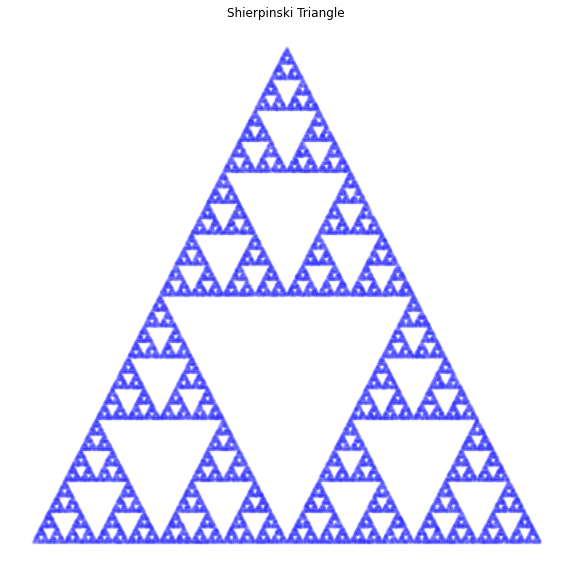

In [5]:
Shierpinski = shierpinski(100000)
plt.figure(figsize=(10,10))
plt.title("Shierpinski Triangle")
plt.plot(Shierpinski[0], Shierpinski[1], "b.", alpha=0.03)
plt.axis('off')

In [6]:
## ideas from https://joaoventura.net/blog/2016/sierpinski-triangle/

#### Determine experimentalmente p1, p2, p3 que hacen su dibujo más denso

#### Ejercicio 2
En general, los juegos del caos pueden definirse como un Framework(F,X,n), donde F es un conjunto de k funciones
determinísticas, y X es una variable aleatoria discreta con distribución probabilística P = {pi | P(X=i) = pi}, y n es la
cantidad de puntos a dibujar. Noten que |P| = k.
Para este fractal en específico considere:
F =
* f1(x, y) (x*0.85 + y*0.04 + 0.0, x*-0.04 + y*0.85 + 1.6)
* f2(x, y) (-0.15*x + 0.28*y + 0.0, x*0.26 + y*0.24 + 0.44)
* f3(x, y) (x*0.2 + y*-0.26 + 0.0, x*0.23 + y*0.22 + 1.6)
* f4(x, y) (x*0.0 + y*0.0, x*0.0 + y*0.16)
* P = {0.85, 0.07, 0.07, 0.01}
* n = 100000


#### Tasks:
* 1. Cree un programa que corra el anterior juego del caos y muestre el dibujo resultante

#### Cree un programa que corra el anterior juego del caos y muestre el dibujo resultante

In [102]:
def deterministic_states(x, y):
    return [(x*0.86 + y*0.04+ 0.0, x*-0.04 + y* 0.85 + 1.6),#f1
            (-0.15*x + 0.28*y + 0.0, x*0.26+ y*0.24+ 0.44), #f2
            (x*0.2 + y*-0.26 + 0.0, x*0.23 + y*0.22 + 1.6), #f3
            (x*0.0 + y*0.0, x*0.0 + y*0.16)                 #f4
           ]

In [113]:
def choose_state(states):
    step = []
    # generates a random integer between 1 and 100
    z = random.randint(1, 100)
    if z == 1:
        step.append(states[3])
    elif z>= 2 and z<= 86:
        step.append(states[0])
    elif z>= 87 and z<= 93:
        step.append(states[1])
    elif z>= 94 and z<= 100:
        step.append(states[2])
    return step[0]

In [114]:
def barnsley_fc(n):
    x, y = [0], [0]
    for i in range(n):
        points = choose_state(deterministic_states(x[i-1], y[i-1]))
        x.append(points[0])
        y.append(points[1]) 
    return x, y

(-2.431382834950496,
 3.082656164512138,
 -0.49876291994665395,
 10.474021318879732)

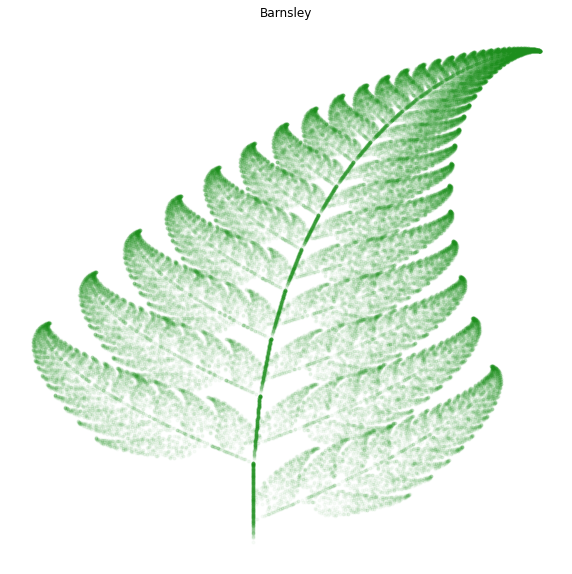

In [115]:
Barnsley = barnsley_fc(100000)
plt.figure(figsize=(10,10))
plt.title("Barnsley")
plt.plot(Barnsley[0], Barnsley[1], "g.", alpha=0.03)
plt.axis('off')

In [66]:
steps = []
states=[(2,2)]
for state in states:
    steps += [state] * int(1)
steps

[(2, 2)]

#### Ejercicio 3
Considere las siguientes dos funciones generados de pseudo randoms:


#### Tasks:
* 1. Construya un programa que compare estos tres generadores a través de un histograma de asteriscos (de 0 a 1 con saltos de 0.1) Use tres comparaciones para 100, 5,000 y 100,000 repeticiones.
* 2. ¿Qué generador le parece mejor? (considere solamente Generador 1 y Generador 2) ¿Por qué?

#### Construya un programa que compare estos tres generadores a través de un histograma de asteriscos (de 0 a 1 con saltos de 0.1) Use tres comparaciones para 100, 5,000 y 100,000 repeticiones

In [9]:
def get_amount_asterisks(n):
    line=''
    for i in range(n):
        line +='*'
    return line

In [10]:
def get_data(random_numbers, factor):
    c0,c1,c2,c3,c4,c5,c6,c7,c8,c9 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    for i in random_numbers:
        if i <= 0.1:
            c0 += 1
        elif 0.1 < i <= 0.2:
            c1 += 1
        elif 0.2 < i <= 0.3:
            c2 += 1
        elif 0.3 < i <= 0.4:
            c3 += 1
        elif 0.4 < i <= 0.5:
            c4 += 1
        elif 0.5 < i <= 0.6:
            c5 += 1
        elif 0.6 < i <= 0.7:
            c6 += 1
        elif 0.7 < i <= 0.8:
            c7 += 1
        elif 0.8 < i <= 0.9:
            c8 += 1
        elif 0.9 < i <= 1:
            c9 += 1

    print('0.0-0.1:  ' + get_amount_asterisks(c0//factor) +'\t'+ str(c0)+','+str(round((c0*100)/len(random_numbers), 2)))
    print('0.1-0.2:  ' + get_amount_asterisks(c1//factor) +'\t'+ str(c1)+','+str(round((c1*100)/len(random_numbers), 2)))
    print('0.2-0.3:  ' + get_amount_asterisks(c2//factor) +'\t'+ str(c2)+','+str(round((c2*100)/len(random_numbers), 2)))
    print('0.3-0.4:  ' + get_amount_asterisks(c3//factor) +'\t'+ str(c3)+','+str(round((c3*100)/len(random_numbers), 2)))
    print('0.4-0.5:  ' + get_amount_asterisks(c4//factor) +'\t'+ str(c4)+','+str(round((c4*100)/len(random_numbers), 2)))
    print('0.5-0.6:  ' + get_amount_asterisks(c5//factor) +'\t'+ str(c5)+','+str(round((c5*100)/len(random_numbers), 2)))
    print('0.6-0.7:  ' + get_amount_asterisks(c6//factor) +'\t'+ str(c6)+','+str(round((c6*100)/len(random_numbers), 2)))
    print('0.7-0.8:  ' + get_amount_asterisks(c7//factor) +'\t'+ str(c7)+','+str(round((c7*100)/len(random_numbers), 2)))
    print('0.8-0.9:  ' + get_amount_asterisks(c8//factor) +'\t'+ str(c8)+','+str(round((c8*100)/len(random_numbers), 2)))
    print('0.9-1.0:  ' + get_amount_asterisks(c9//factor) +'\t'+ str(c9)+','+str(round((c9*100)/len(random_numbers), 2)))
        

In [11]:
def generator(n,type_gen):
    if type_gen == 1:
        prev_x, random_number = 1, []
        for i in range(1, n):
            X = ((5**5)*prev_x)%(2**35-1)
            prev_x = X
            random_number.append(X)
        max_random = max(random_number)
        #return [i/max_random for i in random_number]
        get_data([i/max_random for i in random_number],n//100)
    elif type_gen == 2:
        prev_x, random_number = 1, []
        for i in range(1, n):
            X = ((7**5)*prev_x)%(2**31-1)
            prev_x = X
            random_number.append(X)
        max_random = max(random_number)
        #return [i/max_random for i in random_number]
        get_data([i/max_random for i in random_number],n//100)
    elif type_gen== 3:
        random_number = []
        for i in range(1, n):
            X = random.random()   
            random_number.append(X)
        get_data(random_number,n//100)

#### Generator 1

##### 100 iterations

In [12]:
generator(100, 1)

0.0-0.1:  ********	8,8.08
0.1-0.2:  *********	9,9.09
0.2-0.3:  **********	10,10.1
0.3-0.4:  ***********	11,11.11
0.4-0.5:  ***********	11,11.11
0.5-0.6:  *******	7,7.07
0.6-0.7:  ******	6,6.06
0.7-0.8:  ***********	11,11.11
0.8-0.9:  **********	10,10.1
0.9-1.0:  ****************	16,16.16


##### 500 iterations

In [13]:
generator(500, 1)

0.0-0.1:  ********	44,8.82
0.1-0.2:  *********	45,9.02
0.2-0.3:  **********	51,10.22
0.3-0.4:  **********	53,10.62
0.4-0.5:  *******	39,7.82
0.5-0.6:  ***********	58,11.62
0.6-0.7:  *********	49,9.82
0.7-0.8:  *********	48,9.62
0.8-0.9:  ***********	57,11.42
0.9-1.0:  ***********	55,11.02


##### 1000 iterations

In [14]:
generator(1000, 1)

0.0-0.1:  **********	104,10.41
0.1-0.2:  *********	95,9.51
0.2-0.3:  *********	95,9.51
0.3-0.4:  *********	97,9.71
0.4-0.5:  **********	100,10.01
0.5-0.6:  ***********	110,11.01
0.6-0.7:  **********	102,10.21
0.7-0.8:  *********	92,9.21
0.8-0.9:  **********	104,10.41
0.9-1.0:  **********	100,10.01


#### Generator 2

##### 100 iterations

In [15]:
generator(100, 2)

0.0-0.1:  **************	14,14.14
0.1-0.2:  ***	3,3.03
0.2-0.3:  **********	10,10.1
0.3-0.4:  *********	9,9.09
0.4-0.5:  *********	9,9.09
0.5-0.6:  ***********	11,11.11
0.6-0.7:  **********	10,10.1
0.7-0.8:  ************	12,12.12
0.8-0.9:  *********	9,9.09
0.9-1.0:  ************	12,12.12


##### 500 iterations

In [16]:
generator(500, 2)

0.0-0.1:  **********	50,10.02
0.1-0.2:  *********	47,9.42
0.2-0.3:  **********	54,10.82
0.3-0.4:  ********	42,8.42
0.4-0.5:  **********	53,10.62
0.5-0.6:  ***********	56,11.22
0.6-0.7:  ***********	56,11.22
0.7-0.8:  **********	52,10.42
0.8-0.9:  *********	45,9.02
0.9-1.0:  ********	44,8.82


##### 1000 iterations

In [17]:
generator(1000, 2)

0.0-0.1:  *********	96,9.61
0.1-0.2:  *********	97,9.71
0.2-0.3:  *********	96,9.61
0.3-0.4:  *********	93,9.31
0.4-0.5:  ***********	115,11.51
0.5-0.6:  ***********	113,11.31
0.6-0.7:  **********	107,10.71
0.7-0.8:  *********	97,9.71
0.8-0.9:  *********	95,9.51
0.9-1.0:  *********	90,9.01


#### Generator Base

##### 100 iterations

In [18]:
generator(100, 3)

0.0-0.1:  ***********	11,11.11
0.1-0.2:  ************	12,12.12
0.2-0.3:  *********	9,9.09
0.3-0.4:  ***********	11,11.11
0.4-0.5:  ****	4,4.04
0.5-0.6:  *************	13,13.13
0.6-0.7:  **********	10,10.1
0.7-0.8:  **********	10,10.1
0.8-0.9:  ********	8,8.08
0.9-1.0:  ***********	11,11.11


##### 500 iterations

In [19]:
generator(500, 3)

0.0-0.1:  *******	37,7.41
0.1-0.2:  **********	51,10.22
0.2-0.3:  ************	60,12.02
0.3-0.4:  **********	51,10.22
0.4-0.5:  **********	53,10.62
0.5-0.6:  **********	50,10.02
0.6-0.7:  ***********	55,11.02
0.7-0.8:  **********	50,10.02
0.8-0.9:  **********	51,10.22
0.9-1.0:  ********	41,8.22


##### 1000 iterations

In [20]:
generator(1000, 3)

0.0-0.1:  **********	101,10.11
0.1-0.2:  **********	105,10.51
0.2-0.3:  **********	106,10.61
0.3-0.4:  *********	94,9.41
0.4-0.5:  *********	95,9.51
0.5-0.6:  **********	101,10.11
0.6-0.7:  **********	100,10.01
0.7-0.8:  **********	106,10.61
0.8-0.9:  ********	89,8.91
0.9-1.0:  **********	102,10.21


#### ¿Qué generador le parece mejor? (considere solamente Generador 1 y Generador 2) ¿Por qué?

In [21]:
### explicar que pex

#### Ejercicio 4
Considere la siguiente integral

#### Tasks:
* 1. Transforme la integral a una con límites de 0 a 1, muestre su procedimiento
* 2. Aproxime la integral usando el método de Montecarlo, haciendo 100, 10,000 y 100,000 iteraciones.


#### Transforme la integral a una con límites de 0 a 1, muestre su procedimiento

In [22]:
integral = lambda func, n: sum([func(x) for x in np.random.rand(n)]) / n

In [23]:
monte_carlo = lambda x: (2  * (math.e) ** (-( (1/x) -1)**2)) / (x ** 2)

#### Aproxime la integral usando el método de Montecarlo, haciendo 100, 10,000 y 100,000 iteraciones.

In [24]:
print('---Iterations---')
iterations = [100,1000,1000000]
for n in iterations:
    print(n,'-> ',integral(monte_carlo,n))

---Iterations---
100 ->  1.8173933812948915
1000 ->  1.8060274292956406
1000000 ->  1.773557410592968


#### Ejercicio 5
Considere la siguiente integral

#### Tasks:
* 1. Transforme la integral múltiple a una en la que ambos límites sean de 0 a 1, muestre su procedimiento
* 2. Aproxime la integral usando el método de Montecarlo, haciendo 100, 10,000 y 100,000 iteraciones

#### Transforme la integral a una con límites de 0 a 1, muestre su procedimiento

In [25]:
integral = lambda func, n: sum([func(x, y) for x, y in np.random.rand(n, 2)]) / n

In [26]:
monte_carlo = lambda x, y: (( (1/x) -1 ) * math.e**( - ( (1/x-1) + ( (1/x-1)*y ) )  )) / (x**2)

#### Aproxime la integral usando el método de Montecarlo, haciendo 100, 10,000 y 100,000 iteraciones.

In [27]:
print('---Iterations---')
iterations = [100,1000,1000000]
for n in iterations:
    print(n,'-> ',integral(monte_carlo,n))

---Iterations---
100 ->  0.48630988189353686
1000 ->  0.4777337415331609
1000000 ->  0.5008158155708395
